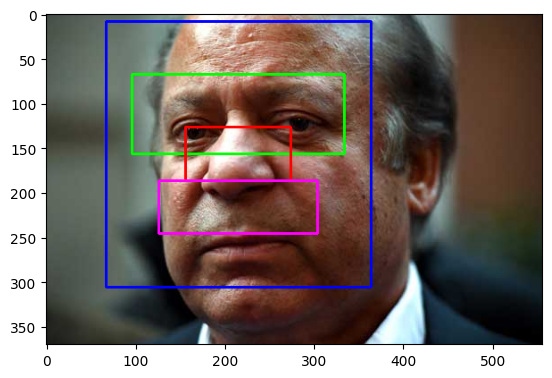

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Check if the cascade is loaded correctly
if face_cascade.empty():
    print("Error: Could not load face cascade.")
    exit()

# Load an image
image = cv2.imread('face.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
    exit()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    # Draw rectangle around the face
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Estimate regions for eyes, nose, and mouth
    # Eyes are in the upper half of the face
    eye_y_start = y + int(h * 0.2)
    eye_y_end = y + int(h * 0.5)
    eye_x_start = x + int(w * 0.1)
    eye_x_end = x + int(w * 0.9)
    cv2.rectangle(image, (eye_x_start, eye_y_start), (eye_x_end, eye_y_end), (0, 255, 0), 2)

    # Nose is in the middle of the face
    nose_y_start = y + int(h * 0.4)
    nose_y_end = y + int(h * 0.6)
    nose_x_start = x + int(w * 0.3)
    nose_x_end = x + int(w * 0.7)
    cv2.rectangle(image, (nose_x_start, nose_y_start), (nose_x_end, nose_y_end), (0, 0, 255), 2)

    # Mouth is in the lower half of the face
    mouth_y_start = y + int(h * 0.6)
    mouth_y_end = y + int(h * 0.8)
    mouth_x_start = x + int(w * 0.2)
    mouth_x_end = x + int(w * 0.8)
    cv2.rectangle(image, (mouth_x_start, mouth_y_start), (mouth_x_end, mouth_y_end), (255, 0, 255), 2)

# Convert BGR image to RGB for display with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis()
plt.show()